# Projet : Classification du rythme cardiaque de l'ECG

Ce jeu de données est composé d'une collections de signaux de battements cardiaques provenant d'un jeu de données célèbres dans le domaine de la classification des battements cardiaques, le jeu de données sur l'arythmie du MIT-BIH. Le nombre d'échantillons dans cette collection est suffisamment important pour entraîner éventuellement un réseau de neurones profond.

Les signaux correspondent à des formes d'électrocardiogramme (ECG) de battements cardiaques pour le cas normal et les cas affectés par différentes arythmies et infarctus du myocarde. Ces signaux sont prétraités et segmentés, chaque segment correspondant à un battement cardiaque.



In [7]:
# from google.colab import drive
# drive.mount('/content/drive/')

In [8]:
#with open('/content/drive/My Drive/Projet Data Classification/foo.txt', 'w') as f:
#  f.write('Hello Google Drive!')

In [9]:
# drive.flush_and_unmount()
# print('All changes made in this colab session should now be visible in Drive.')

In [10]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [11]:
os.chdir('/home/n7student/Documents/ENSEEIHT/3A/data-analysis')
# import dataset
# train_df = pd.read_csv("/content/drive/My Drive/Projet Data Classification/mitbih_train.csv", header = None)
# test_df = pd.read_csv("/content/drive/My Drive/Projet Data Classification/mitbih_test.csv", header = None)
train_df = pd.read_csv("MITBIH/mitbih_train.csv", header = None)
test_df = pd.read_csv("MITBIH/mitbih_test.csv", header = None)

print(train_df.shape)
print(test_df.shape)

train_df.head()

(87554, 188)
(21892, 188)


0         1         2         3         4         5         6    \
0  0.977941  0.926471  0.681373  0.245098  0.154412  0.191176  0.151961   
1  0.960114  0.863248  0.461538  0.196581  0.094017  0.125356  0.099715   
2  1.000000  0.659459  0.186486  0.070270  0.070270  0.059459  0.056757   
3  0.925414  0.665746  0.541436  0.276243  0.196133  0.077348  0.071823   
4  0.967136  1.000000  0.830986  0.586854  0.356808  0.248826  0.145540   

        7         8         9    ...  178  179  180  181  182  183  184  185  \
0  0.085784  0.058824  0.049020  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1  0.088319  0.074074  0.082621  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2  0.043243  0.054054  0.045946  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3  0.060773  0.066298  0.058011  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4  0.089202  0.117371  0.150235  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

   186  187  
0  0.0  0.0  
1  0.0  0.0  
2  0.0  0.0  
3  0.0  0.0  
4  0.0  0.0  

[5 rows x 188 columns]

In [12]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87554 entries, 0 to 87553
Columns: 188 entries, 0 to 187
dtypes: float64(188)
memory usage: 125.6 MB


In [13]:
# Nombres de données manquantes
null_filter = train_df.isnull().sum()
missing_values = null_filter.loc[train_df.isnull().sum() != 0].to_frame().copy()
missing_values

Empty DataFrame
Columns: [0]
Index: []

## Données brutes

In [14]:
# representation des classes
per_class = train_df[187].value_counts()

print(per_class)
plt.figure(figsize=(20,10))
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(per_class, labels=['battements normaux', 'battements inconnus', 'batt. ectopiques ventriculaires', 'Battements ectopiques supraventriculaires', 'Battements de fusion'],autopct='%1.1f%%')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

0.0    72471
4.0     6431
2.0     5788
1.0     2223
3.0      641
Name: 187, dtype: int64


## Equilibrage des classes

In [33]:
from sklearn.utils import resample
df_1=train_df[train_df[187]==1]
df_2=train_df[train_df[187]==2]
df_3=train_df[train_df[187]==3]
df_4=train_df[train_df[187]==4]
df_0=(train_df[train_df[187]==0]).sample(n=20000,random_state=42)

NbSamples=20000

df_1_upsample=resample(df_1,replace=True,n_samples=NbSamples,random_state=123)
df_2_upsample=resample(df_2,replace=True,n_samples=NbSamples,random_state=124)
df_3_upsample=resample(df_3,replace=True,n_samples=NbSamples,random_state=125)
df_4_upsample=resample(df_4,replace=True,n_samples=NbSamples,random_state=126)

train_df=pd.concat([df_0,df_1_upsample,df_2_upsample,df_3_upsample,df_4_upsample])

print(train_df.shape)

# --------------------------------------------------

df_1=test_df[test_df[187]==1]
df_2=test_df[test_df[187]==2]
df_3=test_df[test_df[187]==3]
df_4=test_df[test_df[187]==4]
df_0=(test_df[test_df[187]==0]).sample(n=20000,random_state=42, replace=True)

NbSamples=20000

df_1_upsample=resample(df_1,replace=True,n_samples=NbSamples,random_state=123)
df_2_upsample=resample(df_2,replace=True,n_samples=NbSamples,random_state=124)
df_3_upsample=resample(df_3,replace=True,n_samples=NbSamples,random_state=125)
df_4_upsample=resample(df_4,replace=True,n_samples=NbSamples,random_state=126)

test_df=pd.concat([df_0,df_1_upsample,df_2_upsample,df_3_upsample,df_4_upsample])

print(test_df.shape)

(100000, 188)
(100000, 188)


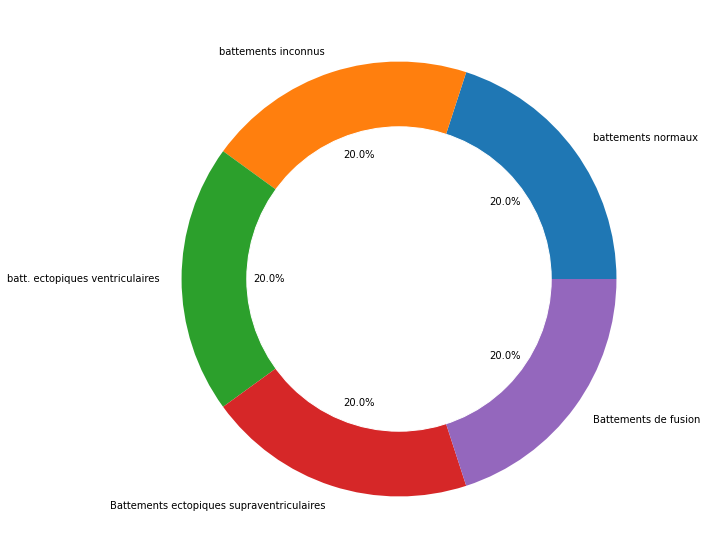

In [16]:
# Représentation des classes
per_class = train_df[187].value_counts()
plt.figure(figsize=(20,10))
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(per_class, labels=['battements normaux', 'battements inconnus', 'batt. ectopiques ventriculaires', 'Battements ectopiques supraventriculaires', 'Battements de fusion'],autopct='%1.1f%%')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

## Représentation des données 

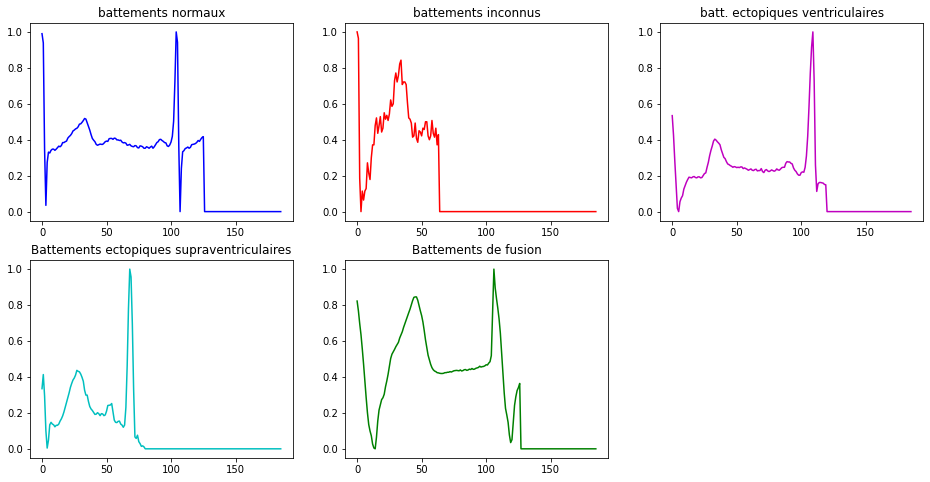

In [17]:
# représentation d'un signal pour chaque classe de battement
plt.figure(figsize=(16,8))
color=['b','r','m','c','g']
classe=['battements normaux', 'battements inconnus', 'batt. ectopiques ventriculaires', 'Battements ectopiques supraventriculaires', 'Battements de fusion']



for class_number in range(5):
    img=train_df.loc[train_df[187]==class_number].values
    
    plt.subplot(2, 3, class_number+1)
    plt.plot(img[1,:186],color[class_number])
    plt.title(classe[class_number])
    


## Jeu de données pour débuter

In [36]:
# Conversion en matrices
DataFull=np.asarray(train_df)
DataFullApp=DataFull[:,:187]
LabelFullApp=DataFull[:,187]
DataFullT=np.asarray(test_df)
DataFullTest=DataFullT[:,:187]
LabelFullTest=DataFullT[:,187]

# Premiers tests sur petite base d'apprentissage et 3 classes
N_CLASSES=5
TAILLE_TEST=100
TAILLE_APP=500

# 20 profils pour les 3 premières natures de battement cardiaque 
# 10 exemplaires de base de test 
DataApp=np.zeros((TAILLE_APP*N_CLASSES,187))

# LabelApp=np.concatenate((np.zeros((TAILLE_APP,1)),np.ones((TAILLE_APP,1)),2*np.ones((TAILLE_APP,1))), axis=None)
LabelApp=np.concatenate((np.zeros((TAILLE_APP,1)),np.ones((TAILLE_APP,1)),2*np.ones((TAILLE_APP,1)),3*np.ones((TAILLE_APP,1)),4*np.ones((TAILLE_APP,1))), axis=None)

for i in range(N_CLASSES):
    DataApp[TAILLE_APP*i:TAILLE_APP*(i+1),:]=DataFullApp[NbSamples*i:NbSamples*i+TAILLE_APP,:]

DataTest=np.zeros((TAILLE_TEST*N_CLASSES,187))
# LabelTest=np.concatenate((np.zeros((TAILLE_TEST,1)),np.ones((TAILLE_TEST,1)),2*np.ones((TAILLE_TEST,1))), axis=None)
LabelTest=np.concatenate((np.zeros((TAILLE_TEST,1)),np.ones((TAILLE_TEST,1)),2*np.ones((TAILLE_TEST,1)),3*np.ones((TAILLE_TEST,1)),4*np.ones((TAILLE_TEST,1))), axis=None)
for i in range(N_CLASSES):
    list_ind=np.where(LabelFullTest==i)
    DataTest[TAILLE_TEST*i:TAILLE_TEST*(i+1),:]=DataFullTest[list_ind[0][:TAILLE_TEST],:]

print(DataApp.shape)
print(LabelTest.shape)

(2500, 187)
(500,)


# Partie I : Implémentation de l'algorithme de programmation dynamique (DTW)

1. Ecrivez une fonction en python DTW qui implémente le calcul et l'affichage de la matrice des coûts définie en TD. 



In [19]:
from math import *
import numpy as np
import sys

def DTW(sigSrc, sigTest):
  N, M = len(sigSrc), len(sigTest)
  w0 = 1 # Cellule au-dessus
  w1 = 1 # Cellule à gauche
  w2 = 1 # Cellule diagonale précédente

  g = np.zeros((N,M)) # Initialisation matrice de NxN à 0.
  for i in range(1,N):
    g[i,0] = inf
  for j in range(1,M):
    g[0,j] = inf
  
  for i in range(1,N):
    for j in range(1,M):
      if abs(N-M) < 5:
        dist = abs(sigSrc[i]-sigTest[j])
        c0 = g[i-1,j]+w0*dist
        c1 = g[i,j-1]+w1*dist
        c2 = g[i-1,j-1]+w2*dist
        g[i,j] = min(c0,c1,c2)

  return g, g[N-1,M-1]/(N+M) # alignment score

# Test:
# print(DTW([0,1,2,3], [-1, 0, 1]))
# Expected:
# (array([[ 0., inf, inf],
#        [inf,  1.,  1.],
#        [inf,  3.,  2.],
#        [inf,  6.,  4.]]), 0.5714285714285714)

## Partie II : système de reconnaissance de battements cardiaques par DTW



**Système de reconnaissance :**
Pour chaque profil temporel test :

a) Calculer pour chaque classe, le score de la DTW entre le profil temporel test et les profils temporels de la classe 

b) Déterminer la classe d'appartenance par minimum du score sur toutes les classes


In [20]:
# # Système de reconnaissance à partir de la DTW
# #colonne gauche ce qu'on a trouvé comme classe, colonne droite, ce qui est censé être
# PartitionDTW=np.zeros((TAILLE_TEST*N_CLASSES,2))
# for testECG in range(TAILLE_TEST*N_CLASSES): # pour chaque ligne de test
#   # faire DTW avec toutes lignes d'app
#   best_score = inf
#   known_label = 5
#   found_label = 5
#   for appECG in range(TAILLE_APP*N_CLASSES):
#     matrix, score = DTW(DataTest[testECG], DataApp[appECG])
#     if score < best_score:
#       best_score = score
#       known_label = LabelTest[testECG]
#       found_label = LabelApp[appECG]
#   # récupérer meilleur score et classe de la ligne app correspondante placer dans partitionDTW[i,0] et placer label connu dans [i,1]
#   PartitionDTW[testECG, 0] = found_label
#   PartitionDTW[testECG, 1] = known_label
# print(PartitionDTW)

In [21]:
# # Calcul en fonction de la classe moyenne

# # Système de reconnaissance à partir de la DTW
# #colonne gauche ce qu'on a trouvé comme classe, colonne droite, ce qui est censé être
# PartitionDTW=np.zeros((TAILLE_TEST*N_CLASSES,2))
# for testECG in range(TAILLE_TEST*N_CLASSES): # pour chaque ligne de test
#   # faire DTW avec toutes lignes d'app
#   scores = {0: [], 1: [], 2: [], 3: [], 4: []}
#   # {
#   #   1: [x, x, x, x]
#   #   ...
#   # }
#   score_per_class = {} # [x, x, x]
#   for appECG in range(TAILLE_APP*N_CLASSES):
#     matrix, score = DTW(DataTest[testECG], DataApp[appECG])
#     scores[LabelApp[appECG]].append(score)
#   for i in scores.keys():
#      score_per_class[i] = (np.mean(scores[i]))
#   best_score = inf
#   best_class = 5
#   for class_id, class_score in score_per_class.items() :
#     if class_score < best_score:
#       best_score = class_score
#       best_class = class_id

#   # récupérer meilleur score et classe de la ligne app correspondante placer dans partitionDTW[i,0] et placer label connu dans [i,1]
#   PartitionDTW[testECG, 0] = best_class
#   PartitionDTW[testECG, 1] = LabelTest[testECG]
# print(PartitionDTW)

**Evaluation :** A partir de la partition de l'ensemble test obtenue après la DTW, calculer la matrice de confusion qui recense le nombre de données bien classés et mal classés.

In [22]:
# # Evaluation des résultats par matrices de confusion 
# from sklearn.metrics import accuracy_score
# from sklearn.metrics import confusion_matrix

# print('Matrice de confusion par DTW')
# cm=confusion_matrix(PartitionDTW[:,0],PartitionDTW[:,1])
# sns.heatmap(data=cm,fmt='.0f',xticklabels=np.unique(classe[:N_CLASSES]),yticklabels=np.unique(classe[:N_CLASSES]),annot=True)

# # score de performance
# print('Accuracy sur base de test :',accuracy_score(PartitionDTW[:,0],PartitionDTW[:,1]))

## Partie III : comparaison de la programmation dynamique avec une méthode de classification après réduction de dimension par ACP

Dans cette partie, nous allons comparer les résultats de la DTW avec ceux d'une méthode de classification de données : les k-plus proches voisins.

Nous utiliserons les fonctions permettant de calculer l'ACP et les kppv via la librairie python *scikit-learn*.


In [24]:
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from mpl_toolkits.mplot3d import Axes3D

### Prétraitement par ACP

Pour tester une autre méthode de classification, 

1. A partir des données Data_App de la base d'apprentissage et en utilisant la fonction *PCA* de la librairie *scikit-learn*, calculez les 3 axes principaux de l'ACP en
extrayant les 3 vecteurs propres, notés $X_1$, $X_2$, $X_3$, associés aux 3 plus grandes valeurs propres de la matrice de
variance-covariance $\Sigma_{App}$.Ces vecteurs propres constitueront la nouvelle base de données.

2. Projetez les données de la base d'apprentissage et de test dans cette nouvelle base en multipliant chaque
vecteur par la base $P = [X_1X_2X_3]$.

*Remarque :* vous pouvez aussi implémenter l'ACP en
extrayant les 3 vecteurs propres, notés $X_1$, $X_2$, $X_3$, associés aux 3 plus grandes valeurs propres de la matrice de
variance-covariance $\Sigma_{App}$ (par les fonctions *np.cov* et *np.linalg.eig*). Ces vecteurs propres constitueront le nouveau repère P.  Projetez ensuite les données de la base d'apprentissage et de test dans cette nouvelle base en multipliant chaque vecteur par la base $P = [X_1X_2X_3]$.



(100000, 42)
[[ 2.95484294e+00 -7.46541876e-01 -6.17550102e-02 ...  7.49561929e-03
  -1.23973563e-01  5.20973094e-03]
 [-9.81507646e-01 -9.04408799e-01  4.62077603e-01 ... -6.66380617e-02
  -4.37358399e-02 -3.18115364e-02]
 [-1.31234468e+00  1.99020577e-01 -4.10346169e-01 ... -6.23720539e-02
  -5.02452548e-03 -2.96345084e-05]
 ...
 [ 4.99668667e-01 -2.14889036e-01 -5.15064352e-01 ...  1.14732349e-02
   2.58746282e-02  5.45213981e-02]
 [-7.20582827e-02  5.62800023e-01 -8.93399174e-01 ...  5.23834184e-03
  -6.00276966e-03  3.88545069e-03]
 [ 2.78705766e+00  7.92243189e-01 -1.21952167e+00 ... -7.12458695e-02
  -2.09327589e-02  8.09583717e-02]]
Percentage of variance: 
0.9715177971199893


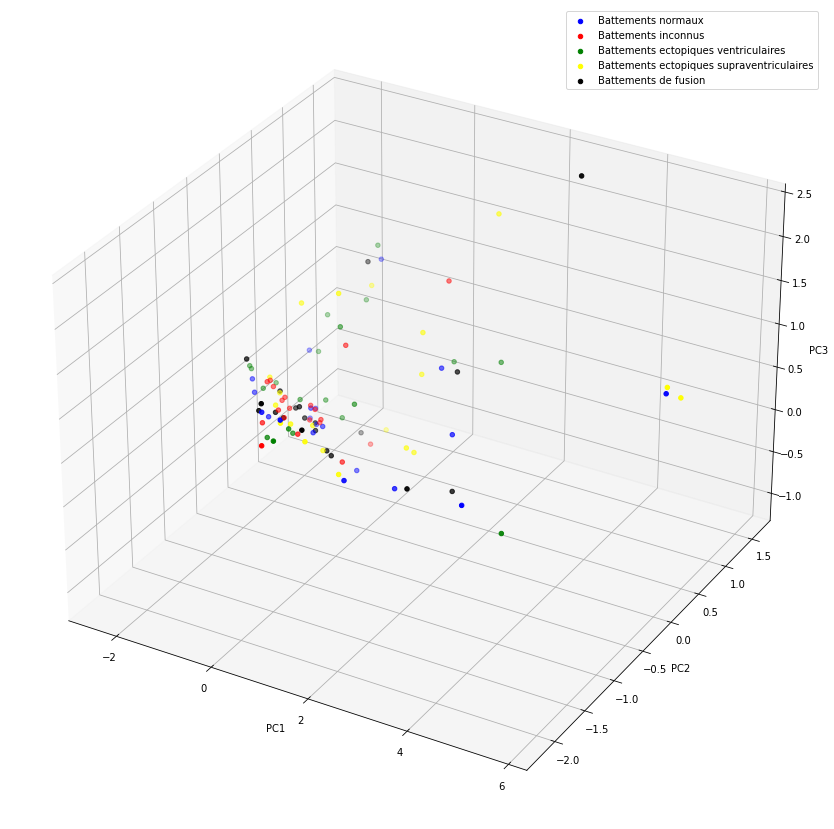

In [37]:
pca = sklearn.decomposition.PCA(n_components=42)
PCA_App = pca.fit_transform(DataFullApp)
print(PCA_App.shape)
print(PCA_App)
PCA_Test = pca.transform(DataFullTest)

fig = plt.figure(figsize=(15,15))
# choose projection 3d for creating a 3d graph
axis = fig.add_subplot(111, projection='3d')
# x[:,0]is pc1,x[:,1] is pc2 while x[:,2] is pc3

# battement normaux
axis.scatter(PCA_App[:TAILLE_APP,0],PCA_App[:TAILLE_APP,1],PCA_App[:TAILLE_APP,2],color='blue',cmap='plasma', label="Battements normaux")
# battement inconnus
axis.scatter(PCA_App[TAILLE_APP:2*TAILLE_APP,0],PCA_App[TAILLE_APP:2*TAILLE_APP,1],PCA_App[TAILLE_APP:2*TAILLE_APP,2],color='red',cmap='plasma', label="Battements inconnus")
# ectopik ventricul
axis.scatter(PCA_App[2*TAILLE_APP:3*TAILLE_APP,0],PCA_App[2*TAILLE_APP:3*TAILLE_APP,1],PCA_App[2*TAILLE_APP:3*TAILLE_APP,2],color='green',cmap='plasma', label="Battements ectopiques ventriculaires")
# ectopik supraventrivul
axis.scatter(PCA_App[3*TAILLE_APP:4*TAILLE_APP,0],PCA_App[3*TAILLE_APP:4*TAILLE_APP,1],PCA_App[3*TAILLE_APP:4*TAILLE_APP,2],color='yellow',cmap='plasma', label="Battements ectopiques supraventriculaires")
# FUSIOOOOOOON
axis.scatter(PCA_App[4*TAILLE_APP:5*TAILLE_APP,0],PCA_App[4*TAILLE_APP:5*TAILLE_APP,1],PCA_App[4*TAILLE_APP:5*TAILLE_APP,2],color='black',cmap='plasma', label="Battements de fusion")

axis.set_xlabel("PC1", fontsize=10)
axis.set_ylabel("PC2", fontsize=10)
axis.set_zlabel("PC3", fontsize=10)
axis.legend()

var_sum = 0
for i in pca.explained_variance_ratio_ :
    var_sum += i
print("Percentage of variance: ")
print(var_sum)



### Classification par k plus proches voisins

En intelligence artificielle, la méthode des k plus proches voisins (k-ppv) est une méthode d'apprentissage
supervisé. Dans ce cadre, on dispose d'une base de données d'apprentissage constituée de couples  "donnée-label". Pour estimer la sortie associée à une nouvelle entrée x, la méthode des k plus proches voisins consiste à prendre
en compte (de façon identique) les k échantillons d'apprentissage dont l'entrée est la plus proche de la nouvelle
entrée x, selon une distance à définir. 


1. En utilisant la fonction *KNeighborsClassifier* de la librairie *sklearn.neighbors*, réalisez une classification par k-ppv sur la base d'apprentissage et la base de test que vous avez prédéfinies (prendre $k=1$).

2. Evaluez la méthode des k-ppv par le calcul de la matrice de confusion et du taux de reconnaissance.

3. Modifiez la valeur de $k$ pour les k-ppv. Améliorez-vous les scores de reconnaissance ?

4. Comparez vos résultats avec ceux de la DTW.





In [29]:
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [111]:
print(PCA_App.shape, PCA_Test.shape)
neigh = KNeighborsClassifier(n_neighbors=5)
knn_facts = neigh.fit(PCA_App, LabelFullApp)
knn_predict = neigh.predict(PCA_Test)

print('Matrice de confusion par KNN')
cm=confusion_matrix(LabelFullTest, knn_predict)
sns.heatmap(data=cm,fmt='.0f',xticklabels=np.unique(classe[:N_CLASSES]),yticklabels=np.unique(classe[:N_CLASSES]),annot=True)

# score de performance
print('Accuracy sur base de test :',accuracy_score(LabelFullTest, knn_predict))

(100000, 42) (100000, 42)
Matrice de confusion par KNN
Accuracy sur base de test : 0.90437


## Partie IV : Comparaison avec d'autres méthodes d'apprentissages supervisés


### Classification par Forêts aléatoires

Les forêts aléatoires font partie des techniques d'apprentissage automatique. Cet algorithme combine les concepts de sous-espaces aléatoires et de bagging. L'algorithme des forêts d'arbres décisionnels effectue un apprentissage sur de multiples arbres de décision entraînés sur des sous-ensembles de données légèrement différents.

In [40]:
from sklearn.ensemble import RandomForestClassifier

Matrice de confusion par RFC
Accuracy sur base de test : 0.87379


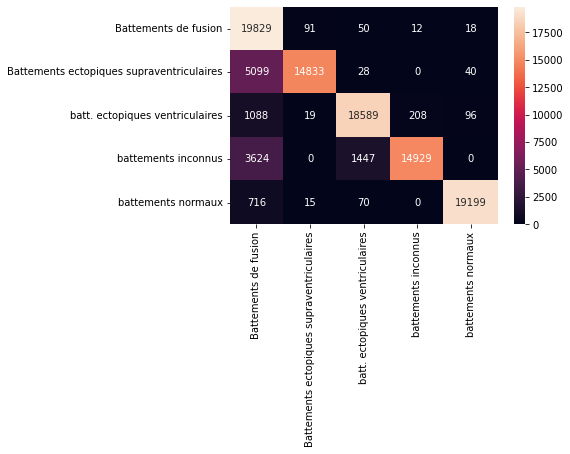

In [42]:
rf = RandomForestClassifier(max_depth=None, n_estimators=100, max_features='auto')
rf.fit(DataFullApp, LabelFullApp)
rfpred = rf.predict(DataFullTest)

print('Matrice de confusion par RFC')
cm=confusion_matrix(LabelFullTest, rfpred)
sns.heatmap(data=cm,fmt='.0f',xticklabels=np.unique(classe[:N_CLASSES]),yticklabels=np.unique(classe[:N_CLASSES]),annot=True)

# score de performance
print('Accuracy sur base de test :',accuracy_score(LabelFullTest, rfpred))

### Classification par réseaux de neurones

1. Réaliser une classification via les réseaux de neurones
2. Evaluer les résultats par matrice de confusion par exemple, fonction de perte...
3. Tester différentes architectures et différentes solveurs

In [45]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import log_loss

In [47]:
neural = MLPClassifier(hidden_layer_sizes=(100,), random_state=1, max_iter=500, tol=0.0001, solver='lbfgs').fit(DataFullApp, LabelFullApp)
mlpred = neural.predict(DataFullTest)

print('Matrice de confusion par MLP')
cm=confusion_matrix(LabelFullTest, mlpred)
sns.heatmap(data=cm,fmt='.0f',xticklabels=np.unique(classe[:N_CLASSES]),yticklabels=np.unique(classe[:N_CLASSES]),annot=True)

# score de performance
print('Accuracy sur base de test :',accuracy_score(LabelFullTest, mlpred))

# Log loss
mlproba = neural.predict_proba(DataFullTest)
logloss = (LabelFullTest, mlproba)
print(logloss)

# Partie V : votre étude

Réalisez votre propre étude en :
- en augmentant les bases de test et/ou d'apprentissage, en faisant du prétraitements sur les données
    - réequilibrage des bases de tests pour augmenter la pertinence des résultats obtenus pour les prédictions
    - comparaison des temps d'exécution
- en proposant des variantes des méthodes proposées ou en utilisant d'autres méthodes
- en rajoutant davantage de classes (jusqu'à 2 supplémentaires : 4-Battements ectopiques supraventriculaires, 5-Battements de fusion)
le tout en testant les différentes approches et en interprétant les résultats, à synthétiser sur un rapport. 